音素ごとのPNエネルギーを導出する

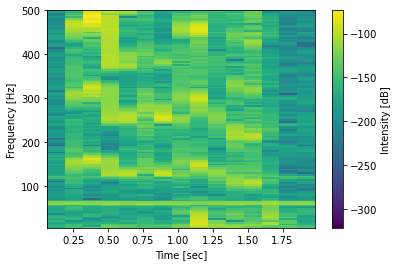

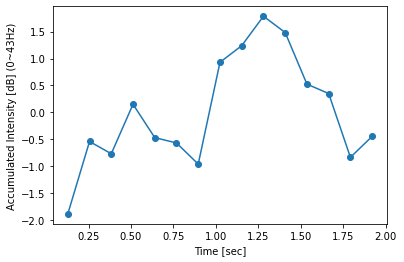

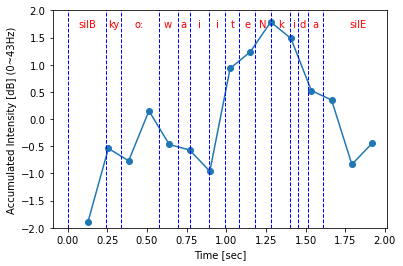

In [2]:
import numpy as np
import pandas as pd
from scipy import signal
import soundfile as sf
import matplotlib.pyplot as plt
import scipy.stats
 

# wav_path='data/wav/takemae1f.wav'
wav_path='wav/sample.wav'
wav_data, fs = sf.read(wav_path)
# wav_data = wav_data[:,1]    #2ch音源(clean,PN)なので、PNが含まれる音声のみに変更する

#STFT
hamm_window = signal.windows.hamming(4096,sym=True) #sym=Trueでperiodicになる（スペクトル解析用）
f,t,Sxx = signal.spectrogram(wav_data, fs=fs, window=hamm_window ,noverlap=2048)
# print(type(Sxx))

#図の描画
plt.pcolormesh(t, f, 10*np.log(Sxx)) #intensityを修正
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([f[1], 500])
cbar = plt.colorbar() #カラーバー表示のため追加
cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示のため追加
plt.show()

# #パターン１：低周波域のエネルギーをそのまま集計(0~40Hz)
# Sxx2 = 10*np.log(Sxx) #スペクトルのエネルギーをdB値に変換
# low_ene = np.zeros(len(t))
# low_ene = Sxx2[0:4,:].sum(axis=0) #0~43Hzのパワースペクトルを集計
# plt.plot(t,low_ene)
# plt.ylabel('Accumulated Intensity [dB] (0~43Hz)')
# plt.xlabel('Time [sec]')
# plt.show()

#パターン２：低周波域のエネルギーを標準化してから集計(0~40Hz)
Sxx2 = 10*np.log(Sxx) #スペクトルのエネルギーをdB値に変換
low_ene = np.zeros(len(t))
low_ene = Sxx2[0:4,:].sum(axis=0) #0~43Hzのパワースペクトルを集計
low_ene_norm = scipy.stats.zscore(low_ene)
plt.scatter(t,low_ene_norm)
plt.plot(t,low_ene_norm)
plt.ylabel('Accumulated Intensity [dB] (0~43Hz)')
plt.xlabel('Time [sec]')
plt.show()

#Juliusの音素データを読み込み（sample.lab）
with open('wav/sample.lab') as f:
    lines = f.readlines() #readlinesで一括読み込み
f.close
cnt = 0
for line in lines:
    lines[cnt] = line.split()
    cnt += 1
pho_seg = pd.DataFrame(lines)
pho_seg[0] = pho_seg[0].astype(float)
pho_seg[1] = pho_seg[1].astype(float)
# pho_seg.shape


#おまけ：音素データとPNデータの統合結果をグラフにプロット
ymin, ymax = -2,2
plt.scatter(t,low_ene_norm)
plt.plot(t,low_ene_norm)
plt.ylabel('Accumulated Intensity [dB] (0~43Hz)')
plt.xlabel('Time [sec]')
plt.ylim(ymin,ymax)
for i in range(len(pho_seg)):
    plt.vlines(pho_seg.iat[i,0],ymin,ymax,colors='blue', linestyle='dashed', linewidth=1)
    plt.text((pho_seg.iat[i,0] + pho_seg.iat[i,1])/2, ymax-0.3, pho_seg.iat[i,2], size=10,horizontalalignment="center", color='red')
plt.show()


#音素データとPNデータの統合　▶　音素ごとのPNエネルギーの導出


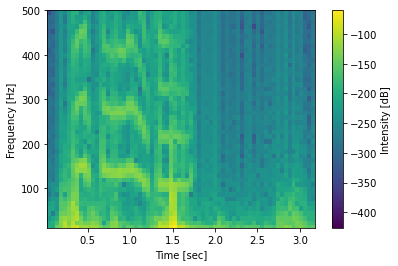

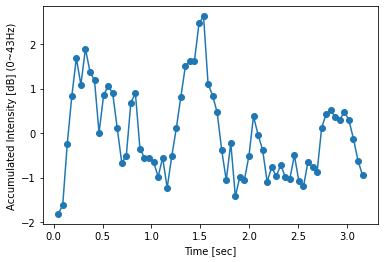

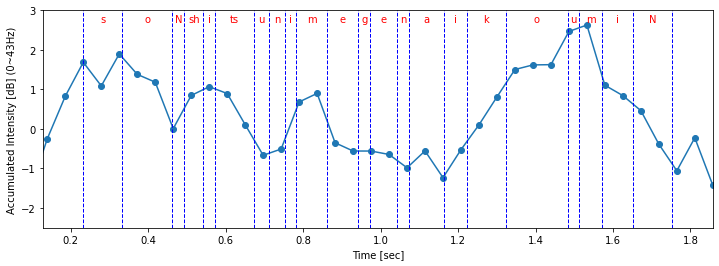

   phoneme  PN-Energy
0        s   1.493318
1        o   1.282563
2        N   0.008097
3       sh   0.847410
4        i   1.069778
5       ts   0.502757
6        u  -0.199149
7        n   0.008653
8        i   0.087843
9        m   0.791364
10       e   0.170558
11       g  -0.558139
12       e  -0.769781
13       n  -0.600140
14       a  -0.752695
15       i  -0.563781
16       k   0.457537
17       o   1.583437
18       u   2.466494
19       m   2.629091
20       i   0.975021
21       N   0.040349


In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import soundfile as sf
import matplotlib.pyplot as plt
import scipy.stats
import os


def pnd(file_name):
    wav_data, fs = sf.read('input_data/{}.wav'.format(file_name))
    # wav_data, fs = sf.read('wav/{}.wav'.format(filename))

    #マイクが2chの時のみこのスクリプトを実行する---------------------------------------------------------------------
    wav_data = wav_data[:,1]    #2ch音源(clean,PN)なので、PNが含まれる音声のみに変更する
    #---------------------------------------------------------------------------------
    

    #STFT
    hamm_window = signal.windows.hamming(4096,sym=True) #sym=Trueでperiodicになる（スペクトル解析用）
    f,t,Sxx = signal.spectrogram(wav_data, fs=fs, window=hamm_window ,noverlap=2048)
    t_dur = (t[0]+t[1])/2 #１フレームの時間


    #図の描画
    plt.pcolormesh(t, f, 10*np.log(Sxx)) #intensityを修正
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim([f[1], 500])
    cbar = plt.colorbar() #カラーバー表示のため追加
    cbar.ax.set_ylabel("Intensity [dB]") #カラーバーの名称表示のため追加
    plt.show()

    # #パターン１：低周波域のエネルギーをそのまま集計(0~40Hz)
    # Sxx2 = 10*np.log(Sxx) #スペクトルのエネルギーをdB値に変換
    # low_ene = np.zeros(len(t))
    # low_ene = Sxx2[0:4,:].sum(axis=0) #0~43Hzのパワースペクトルを集計
    # plt.plot(t,low_ene)
    # plt.ylabel('Accumulated Intensity [dB] (0~43Hz)')
    # plt.xlabel('Time [sec]')
    # plt.show()

    #パターン２：低周波域のエネルギーを集計して標準化を行う(0~40Hz)
    Sxx2 = 10*np.log(Sxx) #スペクトルのエネルギーをdB値に変換
    low_ene = np.zeros(len(t))
    low_ene = Sxx2[0:4,:].sum(axis=0) #0~43Hzのパワースペクトルを集計
    low_ene_norm = scipy.stats.zscore(low_ene)
    plt.scatter(t,low_ene_norm)
    plt.plot(t,low_ene_norm)
    plt.ylabel('Accumulated Intensity [dB] (0~43Hz)')
    plt.xlabel('Time [sec]')
    plt.show()

    #Juliusの音素データを読み込み（sample.lab）
    with open('wav/{}.lab'.format(file_name)) as f:
        lines = f.readlines() #readlinesで一括読み込み
    f.close
    cnt = 0
    for line in lines:
        lines[cnt] = line.split()
        cnt += 1
    pho_seg = pd.DataFrame(lines)
    pho_seg[0] = pho_seg[0].astype(float)
    pho_seg[1] = pho_seg[1].astype(float)
    # pho_seg.shape


    #おまけ：音素データとPNデータの統合結果をグラフにプロット
    ymin, ymax = -2.5,3
    plt.figure(figsize=(12,4)) #図のサイズのデフォルトは(6.4, 4.8)
    plt.scatter(t,low_ene_norm)
    plt.plot(t,low_ene_norm)
    plt.ylabel('Accumulated Intensity [dB] (0~43Hz)')
    plt.xlabel('Time [sec]')
    plt.ylim(ymin,ymax)
    plt.xlim(pho_seg.iat[0,0]-1.5*t_dur, pho_seg.iat[-1,1]+1.5*t_dur)
    for i in range(len(pho_seg)):
        plt.vlines(pho_seg.iat[i,0],ymin,ymax,colors='blue', linestyle='dashed', linewidth=1)
        plt.text((pho_seg.iat[i,0] + pho_seg.iat[i,1])/2, ymax-0.3, pho_seg.iat[i,2], size=10,horizontalalignment="center", color='red')
    plt.vlines(pho_seg.iat[i,1],ymin,ymax,colors='blue', linestyle='dashed', linewidth=1)
    plt.show()


    #音素データとPNデータの統合　▶　音素ごとのPNエネルギーの導出
    pho_PN = np.zeros(len(pho_seg)) #音素ごとの平均PNエネルギー
    for i in range(len(pho_seg)):
        pho_sta = pho_seg.iat[i,0]
        pho_end = pho_seg.iat[i,1]  
        cnt = 0
        temp = 0
        pre_num = 0
        post_num = 0
        for j in range(len(t)): 
            if pho_sta < t[j] :
                if pre_num == 0: #音素範囲外の１つ前のフレーム番号を保存
                    pre_num = j-1
                if t[j] < pho_end: #音素フレーム間（startとendの間）にPNフレームがある時
                    cnt += 1
                    temp += low_ene_norm[j]
                else:
                    if post_num == 0: #音素範囲外の１つ外のフレーム番号を保存
                        post_num = j  

        if temp > 0: #音素のstartとendの間にPNフレームが無いとき
            pho_PN[i] = temp/cnt
        else: #音素のstartとendの間にPNフレームが無いとき
            pho_PN[i] = (low_ene_norm[pre_num] + low_ene_norm[post_num])/2
    
    pho_PN = pd.DataFrame({'PN-Energy':pho_PN})
    pho_seg = pd.DataFrame({'phoneme':pho_seg[2]})
    pho_PNene = pd.concat([pho_seg,pho_PN], axis=1)

    print(pho_PNene)
    




pnd("takemae1f")
